<a href="https://colab.research.google.com/github/gmauricio-toledo/MetodosNumericos/blob/main/Introducci%C3%B3n_a_la_regresi%C3%B3n_lineal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1>Introducción a la Regresión Lineal</h1>

# 1. Ejemplo: La lóngitud del femur

## Descargamos el archivo de datos desde github

In [2]:
!pip -q install wget

import wget

wget.download(url='https://raw.githubusercontent.com/gmauricio-toledo/MetodosNumericos/main/datos/Dataindsamling.csv',
              out='Dataindsamling.csv')

'Dataindsamling.csv'

## Extraemos los datos

In [3]:
import pandas as pd

In [4]:
df = pd.read_csv('/content/Dataindsamling.csv')
df

,ID,Location,Site_Number,Grave Number,Canine number,Incisor number,Abnormalities Vertebras,Abnormalities Femur,Notes,Date,...,Age_Maximum,Sex,Canine largest age,Incisor largest age,Incisor 2nd largest age,Height in grave,Femur left,Femur right,Hyperplasia,Teeth Scorable
0,5,Ribe,ASR1015,G229,0.0,0.0,To hvirvler fusioneret - har ingen betydning f...,NaN,NaN,05/08/08 00:00:00,...,60.0,Male,0.0,0.0,0.0,171.5,50.8,51.3,0,1
1,6,Ribe,ASR1015,G257,NaN,NaN,NaN,NaN,"Male?, højre femur kan ikke måles da nedbrudt,...",05/08/08 00:00:00,...,40.0,Male,NaN,NaN,NaN,165.0,45.4,NaN,0,0
2,7,Ribe,ASR1015,G74,NaN,NaN,NaN,NaN,kraniet mangler - kig efter om det er på udsti...,NaN,...,55.0,Male,NaN,NaN,NaN,165.0,47.5,46.6,0,0
3,8,Ribe,ASR1015,G61,NaN,NaN,NaN,NaN,Tænder mere en 1/3 slidt ned,05/08/08 00:00:00,...,40.0,Male,NaN,NaN,NaN,164.0,47.0,46.4,0,0
4,9,Ribe,ASR1015,G377,3.0,NaN,NaN,Knækkede postmortalt så kan ikke måles,Incisor mere end 1/3 slidt ned,05/08/08 00:00:00,...,60.0,Male,3.5,NaN,NaN,166.0,NaN,NaN,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112,28,Ribe,ASR1015,G166,5.0,NaN,NaN,NaN,NaN,05/19/08 00:00:00,...,45.0,Male,2.5,NaN,NaN,170.0,48.3,47.8,1,1
113,34,G216,ASR1015,G216,1.0,1.0,NaN,NaN,NaN,NaN,...,40.0,Male,3.0,3.0,NaN,166.5,0.0,47.3,1,1
114,29,Ribe,ASR1015,G70,2.0,3.0,NaN,Meget store og robuste. En rigtig mand.,Der er nok noget lepra kørende.I 2 kasser.,05/19/08 00:00:00,...,50.0,Male,2.5,2.5,2.0,183.0,52.8,52.5,1,1
115,40,Ribe,ASR1015,G274,3.0,NaN,NaN,NaN,Lidt lepra har man jo altid.,05/19/08 00:00:00,...,40.0,Female,3.5,NaN,NaN,158.0,43.8,43.1,1,1


In [5]:
import numpy as np

df = df[df['Sex']=='Male'].copy()
df_data = df[['Femur left','Height in grave']].copy()
df_data.dropna(inplace=True)
df_data = df_data[df_data['Femur left']!=0].copy()
df_data = df_data[df_data['Height in grave']!=0].copy()

datos = df_data.values
datos.shape

(52, 2)

## Los datos

In [6]:
datos

array([[ 50.8, 171.5],
       [ 45.4, 165. ],
       [ 47.5, 165. ],
       [ 47. , 164. ],
       [ 52. , 185. ],
       [ 51.4, 182. ],
       [ 44.9, 154. ],
       [ 48.4, 170. ],
       [ 45.6, 169. ],
       [ 47.3, 170. ],
       [ 45.6, 166. ],
       [ 41.6, 148. ],
       [ 48.5, 173. ],
       [ 49. , 175. ],
       [ 47.8, 170. ],
       [ 44.1, 153. ],
       [ 50.8, 174.5],
       [ 45.8, 163. ],
       [ 44.3, 159. ],
       [ 50. , 173. ],
       [ 51.3, 179. ],
       [ 46.1, 167.5],
       [ 50.8, 171.5],
       [ 48.5, 170.5],
       [ 49.3, 177. ],
       [ 47. , 164. ],
       [ 54.4, 184. ],
       [ 52.6, 180. ],
       [ 47. , 168. ],
       [ 47. , 170. ],
       [ 44.5, 163. ],
       [ 48.4, 174. ],
       [ 45.1, 161. ],
       [ 48. , 159. ],
       [ 47.5, 171. ],
       [ 48. , 175. ],
       [ 46.2, 166. ],
       [ 52. , 177. ],
       [ 48. , 171.5],
       [ 46.6, 169. ],
       [ 51.3, 172.5],
       [ 45.6, 174. ],
       [ 50.8, 179. ],
       [ 42

Graficamos

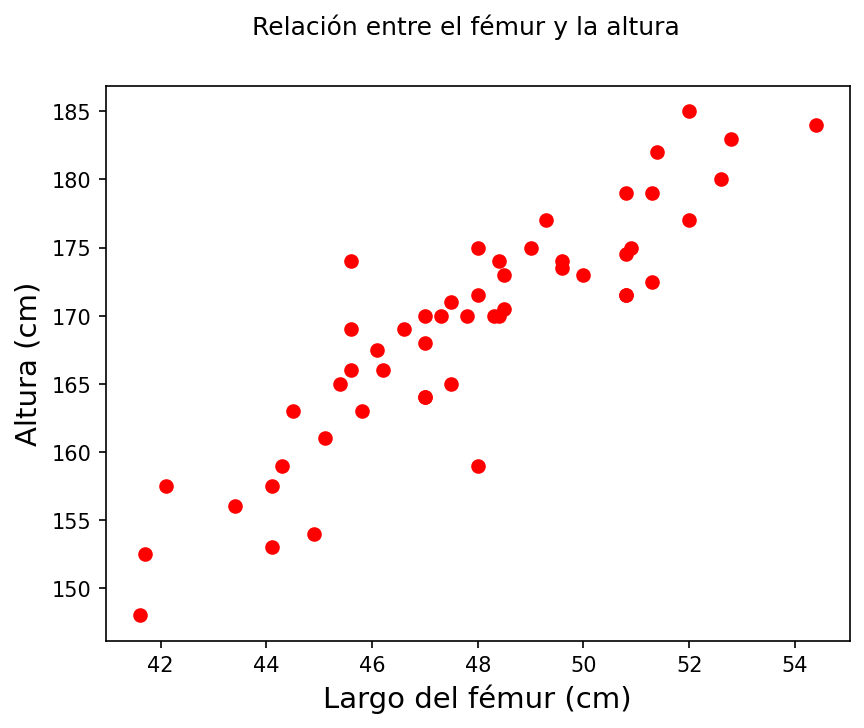

In [5]:
import matplotlib.pyplot as plt

plt.figure(dpi=150)
plt.suptitle("Relación entre el fémur y la altura")
plt.scatter(datos[:,0],datos[:,1],color='red')
plt.xlabel('Largo del fémur (cm)',fontsize=14)
plt.ylabel('Altura (cm)',fontsize=14)
plt.show()

In [ ]:
np.savetxt(fname='datos_femur_altura.csv',X=datos)

## La regresión lineal

In [7]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(datos[:,0].reshape(-1,1),datos[:,1])

LinearRegression()

Pendiente y ordenada al origen

In [8]:
lr.coef_, lr.intercept_

(array([2.54415906]), 47.4414872142391)

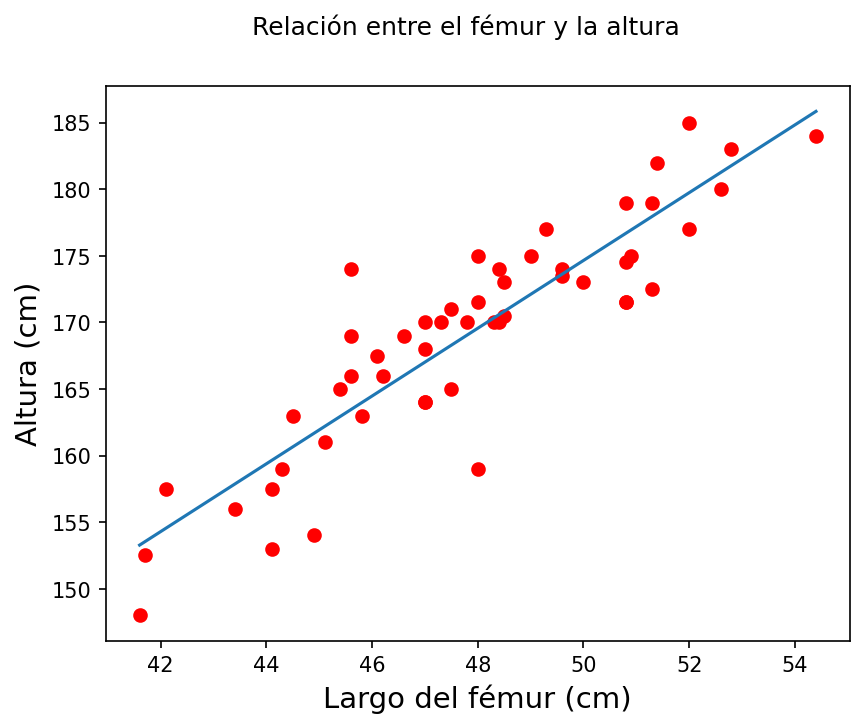

In [11]:
import matplotlib.pyplot as plt

a = np.min(datos[:,0])
b = np.max(datos[:,0])

x_axis = np.linspace(a,b,100)
line = [lr.coef_*x + lr.intercept_ for x in x_axis]

plt.figure(dpi=150)
plt.suptitle("Relación entre el fémur y la altura")
plt.scatter(datos[:,0],datos[:,1],color='red')
plt.plot(x_axis,line)
plt.xlabel('Largo del fémur (cm)',fontsize=14)
plt.ylabel('Altura (cm)',fontsize=14)
plt.show()

In [12]:
lr.score(datos[:,0].reshape(-1,1),datos[:,1])

0.8024437811952196

# 2. Ejemplo de clase

In [14]:
ys = np.array([0.5,2.5,2,4,3.5,6,5.5])
xs = np.array(list(range(1,8)))

lr2 = LinearRegression()
lr2.fit(xs.reshape(-1,1),ys)
lr2.score(xs.reshape(-1,1),ys)

0.8683176100628931

In [15]:
lr2.coef_, lr2.intercept_

(array([0.83928571]), 0.07142857142857117)